# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [81]:
dataset = pd.read_csv('diabetes-dataset.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [82]:
dataset.shape # Check number of columns and rows in data frame

(2000, 9)

In [83]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot: xlabel='Outcome', ylabel='count'>

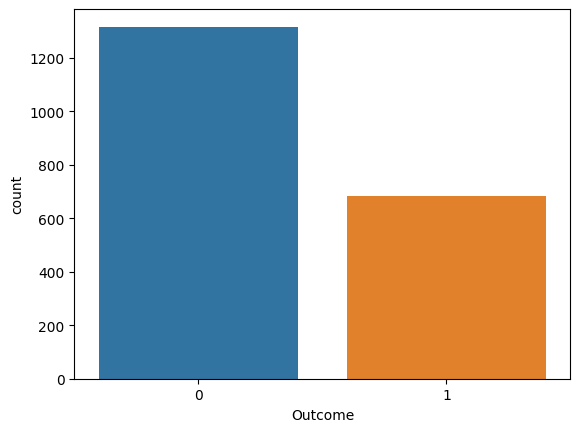

In [84]:
sns.countplot(x="Outcome",data=dataset)

In [85]:
dataset.isnull().values.any() # If there are any null values in data set

False

In [86]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0, strategy='mean')
imputer.fit(X[:, 1:7])
X[:, 1:7] = imputer.transform(X[:, 1:7])
X

array([[2.00000000e+00, 1.38000000e+02, 6.20000000e+01, ...,
        3.36000000e+01, 1.27000000e-01, 4.70000000e+01],
       [0.00000000e+00, 8.40000000e+01, 8.20000000e+01, ...,
        3.82000000e+01, 2.33000000e-01, 2.30000000e+01],
       [0.00000000e+00, 1.45000000e+02, 7.24036649e+01, ...,
        4.42000000e+01, 6.30000000e-01, 3.10000000e+01],
       ...,
       [6.00000000e+00, 8.50000000e+01, 7.80000000e+01, ...,
        3.12000000e+01, 3.82000000e-01, 4.20000000e+01],
       [0.00000000e+00, 1.29000000e+02, 1.10000000e+02, ...,
        6.71000000e+01, 3.19000000e-01, 2.60000000e+01],
       [2.00000000e+00, 8.10000000e+01, 7.20000000e+01, ...,
        3.01000000e+01, 5.47000000e-01, 2.50000000e+01]])

In [87]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


## Identify Correlation in data 

In [88]:
dataset.corr() # It will show correlation matrix 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


In [89]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

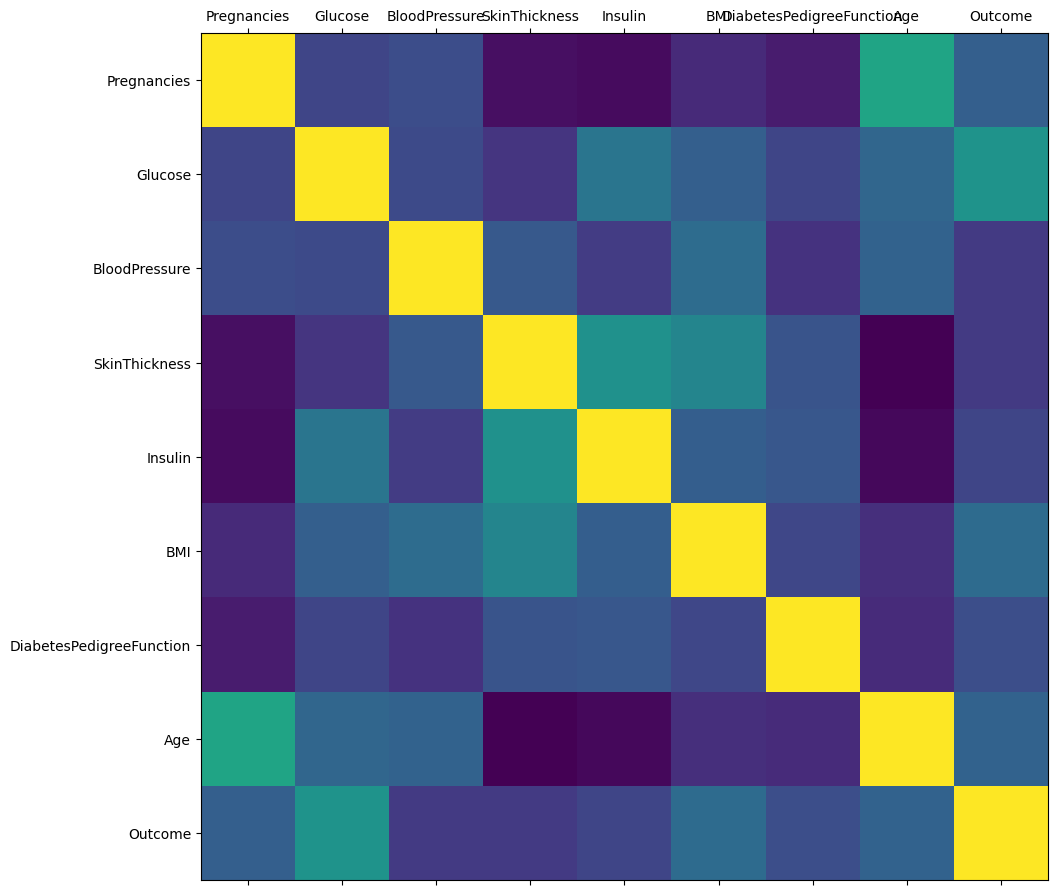

In [90]:
plot_corr(dataset)

KeyError: 'class'

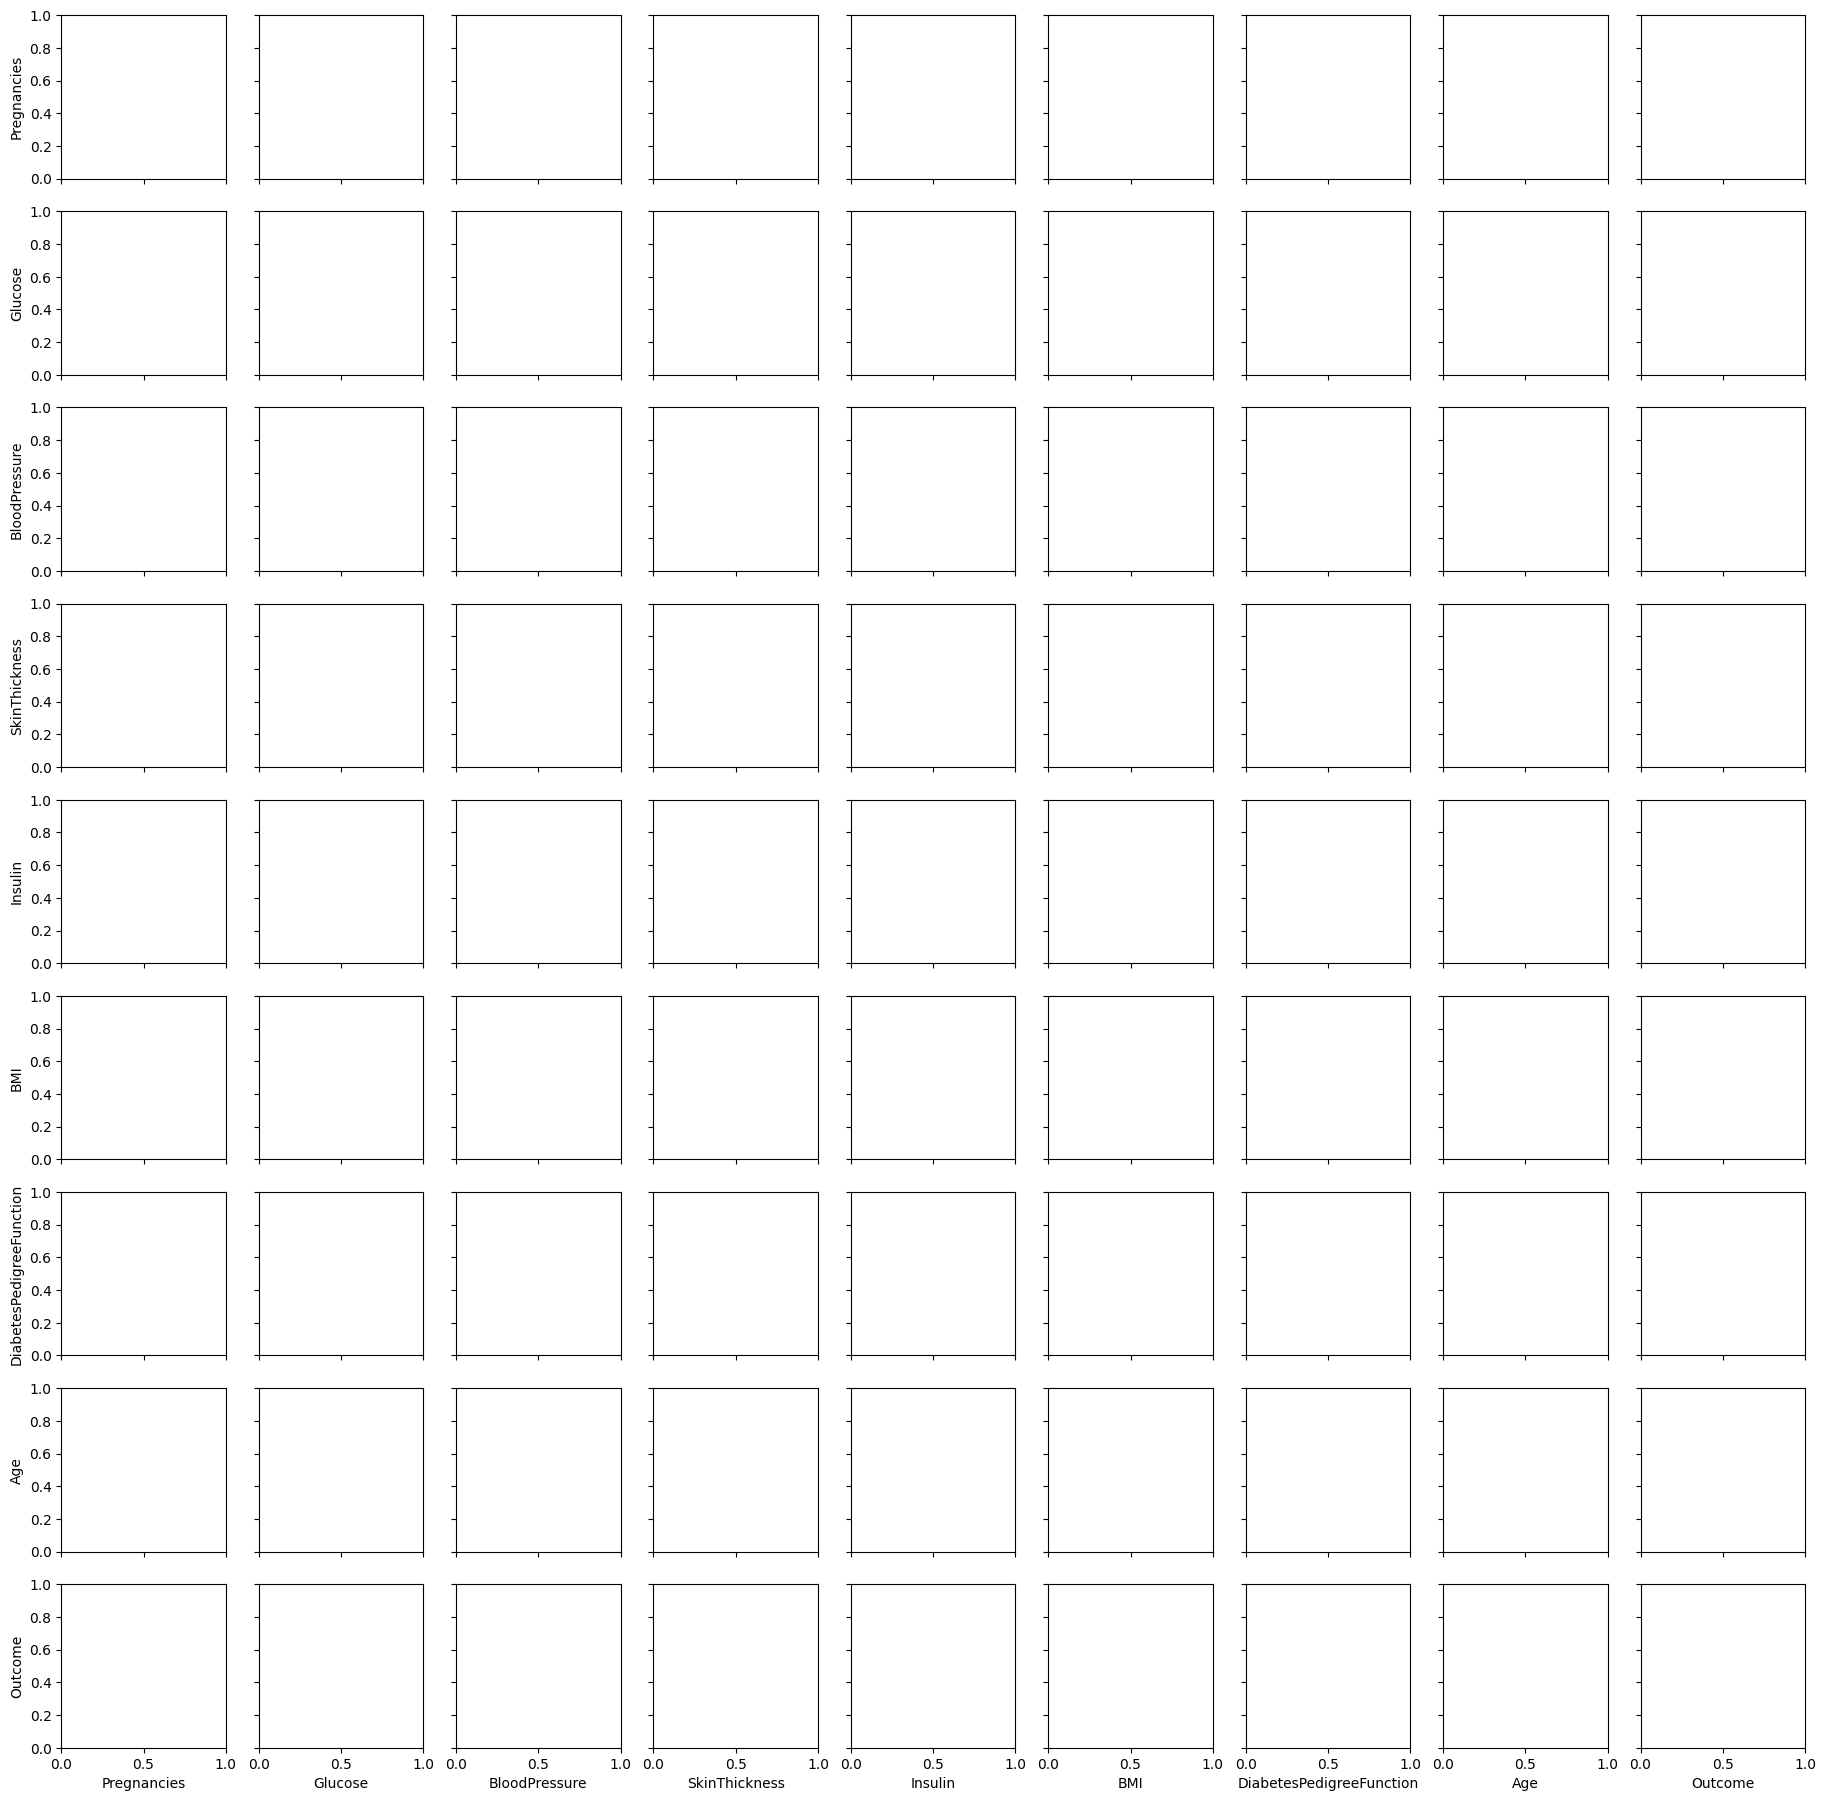

In [91]:
sns.pairplot(dataset,diag_kind='kde',hue='class')

## Splitting the dataset into the Training set and Test set

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [93]:
print(X_train)

[[  0.         102.          78.         ...  34.5          0.238
   24.        ]
 [ 11.         138.          74.         ...  36.1          0.557
   50.        ]
 [  0.         105.          84.         ...  27.9          0.741
   62.        ]
 ...
 [  4.          95.          64.         ...  32.           0.161
   31.        ]
 [ 11.          85.          74.         ...  30.1          0.3
   35.        ]
 [  5.         136.          82.         ...  32.65010142   0.64
   69.        ]]


In [94]:
print(y_train)

[0 1 1 ... 1 0 0]


In [95]:
print(X_test)

[[  2.         123.          48.         ...  42.1          0.52
   26.        ]
 [  2.         106.          56.         ...  29.           0.426
   22.        ]
 [  6.         195.          70.         ...  30.9          0.328
   31.        ]
 ...
 [  1.         112.          80.         ...  34.8          0.217
   24.        ]
 [  0.         123.          72.         ...  36.3          0.258
   52.        ]
 [  0.         145.          72.40366492 ...  44.2          0.63
   31.        ]]


In [96]:
print(y_test)

[0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0
 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1
 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0
 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1
 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1
 0 0 0 0 0 0 0 1 1 1 0 0 

## Feature Scaling

In [97]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [98]:
print(X_train)

[[-1.12465431 -0.64587574  0.45716437 ...  0.23213561 -0.72697714
  -0.76736899]
 [ 2.2488705   0.52284564  0.12306465 ...  0.45045127  0.25176984
   1.48923396]
 [-1.12465431 -0.54848229  0.95831396 ... -0.6684165   0.81631355
   2.53074301]
 ...
 [ 0.10208198 -0.87312712 -0.71218467 ... -0.10898262 -0.96322641
  -0.15982204]
 [ 2.2488705  -1.19777195  0.12306465 ... -0.36823246 -0.53675045
   0.18734764]
 [ 0.40876606  0.45791668  0.7912641  ... -0.02027804  0.50642814
   3.13828996]]


In [99]:
print(X_test)

[[-0.51128616  0.0358784  -2.04858358 ...  1.269135    0.13824746
  -0.59378415]
 [-0.51128616 -0.51601781 -1.38038412 ... -0.51832448 -0.15016074
  -0.94095383]
 [ 0.71545013  2.37332117 -0.21103508 ... -0.25907463 -0.45084163
  -0.15982204]
 ...
 [-0.81797024 -0.32123091  0.62421424 ...  0.27306979 -0.79140876
  -0.76736899]
 [-1.12465431  0.0358784  -0.04398522 ...  0.47774072 -0.66561369
   1.6628188 ]
 [-1.12465431  0.75009702 -0.01026913 ...  1.5556743   0.47574642
  -0.15982204]]


## Training the Logistic Regression model on the Training set

In [100]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(random_state = 0)
LR_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Training the K-NN model on the Training set

In [101]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Training the Decision Tree Classification model on the Training set

In [102]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
DT_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

## Training the Random Forest Classification model on the Training set

## Predicting a new result

In [103]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [104]:
print(RF_classifier.predict(sc.transform([[2,138,62,35,0,33,0.15,40]])))

[0]


## Training the Naive Bayes model on the Training set

In [105]:
from sklearn.naive_bayes import GaussianNB
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

GaussianNB()

## Training the SVM model on the Training set

In [106]:
from sklearn.svm import SVC
SVM_classifier = SVC(kernel = 'linear', random_state = 0)
SVM_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Predicting the Test set results

In [107]:
y_predLR = LR_classifier.predict(X_test)
print(np.concatenate((y_predLR.reshape(len(y_predLR),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 ...
 [0 0]
 [0 1]
 [1 1]]


In [108]:
y_predKNN = KNN_classifier.predict(X_test)
print(np.concatenate((y_predKNN.reshape(len(y_predKNN),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 ...
 [0 0]
 [0 1]
 [1 1]]


In [109]:
y_predDT = DT_classifier.predict(X_test)
print(np.concatenate((y_predDT.reshape(len(y_predDT),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 ...
 [0 0]
 [1 1]
 [1 1]]


In [110]:
y_predRF = RF_classifier.predict(X_test)
print(np.concatenate((y_predRF.reshape(len(y_predRF),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 ...
 [0 0]
 [1 1]
 [1 1]]


In [111]:
y_predNB = NB_classifier.predict(X_test)
print(np.concatenate((y_predNB.reshape(len(y_predNB),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 ...
 [0 0]
 [0 1]
 [1 1]]


In [112]:
y_predSVM = SVM_classifier.predict(X_test)
print(np.concatenate((y_predSVM.reshape(len(y_predSVM),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 ...
 [0 0]
 [0 1]
 [1 1]]


## Making the Confusion Matrix

In [113]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predLR)
print(cm)
accuracy_score(y_test, y_predLR)

[[356  41]
 [ 87 116]]


0.7866666666666666

In [114]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predKNN)
print(cm)
accuracy_score(y_test, y_predKNN)

[[346  51]
 [ 73 130]]


0.7933333333333333

In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predDT)
print(cm)
accuracy_score(y_test, y_predDT)

[[382  15]
 [  9 194]]


0.96

In [116]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predRF)
print(cm)
accuracy_score(y_test, y_predRF)

[[394   3]
 [ 16 187]]


0.9683333333333334

In [117]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predSVM)
print(cm)
accuracy_score(y_test, y_predSVM)

[[350  47]
 [ 89 114]]


0.7733333333333333

In [118]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predNB)
print(cm)
accuracy_score(y_test, y_predNB)

[[340  57]
 [ 80 123]]


0.7716666666666666

## Predicting a new result

In [119]:
print(LR_classifier.predict(sc.transform([[2,138,62,35,0,33,0.15,40]])))
print(KNN_classifier.predict(sc.transform([[2,138,62,35,0,33,0.15,40]])))
print(DT_classifier.predict(sc.transform([[2,138,62,35,0,33,0.15,40]])))
print(RF_classifier.predict(sc.transform([[2,138,62,35,0,33,0.15,40]])))
print(NB_classifier.predict(sc.transform([[2,138,62,35,0,33,0.15,40]])))
print(SVM_classifier.predict(sc.transform([[2,138,62,35,0,33,0.15,40]])))

[0]
[1]
[0]
[0]
[0]
[0]


In [120]:
#function for printing the evaluation metrice
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")

        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("\nTest Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [121]:
print_score(LR_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(LR_classifier, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 77.57%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.792271    0.728767  0.775714     0.760519      0.770453
recall       0.892274    0.553015  0.775714     0.722644      0.775714
f1-score     0.839304    0.628842  0.775714     0.734073      0.766995
support    919.000000  481.000000  0.775714  1400.000000   1400.000000

Test Result:
Accuracy Score: 78.67%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.803612    0.738854  0.786667    0.771233      0.781702
recall       0.896725    0.571429  0.786667    0.734077      0.786667
f1-score     0.847619    0.644444  0.786667    0.746032      0.778878
support    397.000000  203.000000  0.786667  600.000000    600.000000


In [122]:
print_score(KNN_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(KNN_classifier, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.93%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.917031    0.836777  0.889286     0.876904      0.889458
recall       0.914037    0.841996  0.889286     0.878016      0.889286
f1-score     0.915531    0.839378  0.889286     0.877455      0.889367
support    919.000000  481.000000  0.889286  1400.000000   1400.000000

Test Result:
Accuracy Score: 79.33%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.825776    0.718232  0.793333    0.772004      0.789390
recall       0.871537    0.640394  0.793333    0.755965      0.793333
f1-score     0.848039    0.677083  0.793333    0.762561      0.790199
support    397.000000  203.000000  0.793333  600.000000    600.000000


In [123]:
print_score(DT_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(DT_classifier, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    919.0  481.0       1.0     1400.0        1400.0

Test Result:
Accuracy Score: 96.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.976982    0.928230      0.96    0.952606      0.960488
recall       0.962217    0.955665      0.96    0.958941      0.960000
f1-score     0.969543    0.941748      0.96    0.955645      0.960139
support    397.000000  203.000000      0.96  600.000000    600.000000


In [124]:
print_score(RF_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(RF_classifier, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.86%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.997828    1.000000  0.998571     0.998914      0.998575
recall       1.000000    0.995842  0.998571     0.997921      0.998571
f1-score     0.998913    0.997917  0.998571     0.998415      0.998571
support    919.000000  481.000000  0.998571  1400.000000   1400.000000

Test Result:
Accuracy Score: 96.83%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.960976    0.984211  0.968333    0.972593      0.968837
recall       0.992443    0.921182  0.968333    0.956813      0.968333
f1-score     0.976456    0.951654  0.968333    0.964055      0.968065
support    397.000000  203.000000  0.968333  600.000000    600.000000


In [125]:
print_score(SVM_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(SVM_classifier, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 76.86%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.791381    0.707124  0.768571     0.749253      0.762433
recall       0.879217    0.557173  0.768571     0.718195      0.768571
f1-score     0.832990    0.623256  0.768571     0.728123      0.760931
support    919.000000  481.000000  0.768571  1400.000000   1400.000000

Test Result:
Accuracy Score: 77.33%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.797267    0.708075  0.773333    0.752671      0.767090
recall       0.881612    0.561576  0.773333    0.721594      0.773333
f1-score     0.837321    0.626374  0.773333    0.731847      0.765950
support    397.000000  203.000000  0.773333  600.000000    600.000000
